In [1]:
!pip install d2l==1.0.0-beta0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.6/141.6 KB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 KB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 42.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.6/155.6 KB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.0/121.0 KB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 KB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.4 MB/s eta 0:00:00
  Created wheel for gym: filename=gym-0.21.0-py3-none-any.whl size=1616821 sha256=38801bed0c71ae19108ee28a0b37701facda685137297bc3428a15fb754a7c01
  Stored in directory: /root/.cache/pip/wheels/27/6d/b3/a3a6e10704795c9b9000f1ab2dc480dfe7bed42f5972806e73
Successfully built gym
  Attempting uninstal

In [2]:
import torch
from torch import nn
from d2l import torch as d2l

In [3]:
@d2l.add_to_class(d2l.Classifier)
def layer_summary(self, X_shape):
  X = torch.randn(*X_shape)
  for layer in self.net:
    X = layer(X)
    print(layer.__class__.__name__, 'output shape: \t', X.shape)

In [4]:
@d2l.add_to_class(d2l.Classifier)
def training_step(self, batch):
        l = self.loss(self(*batch[:-1]), batch[-1])
        Y_hat = self(*batch[:-1])
        self.plot('loss', l, train=True)
        self.plot('acc', self.accuracy(Y_hat, batch[-1]), train=True)
        return l

In [5]:
@d2l.add_to_class(d2l.Classifier)
def validation_step(self, batch):
        Y_hat = self(*batch[:-1])
        self.plot('acc', self.accuracy(Y_hat, batch[-1]), train=False)

In [24]:
pip install ptflops

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
data = d2l.FashionMNIST(batch_size=128, resize=(224, 224))

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



In [16]:
# class AlexNet(d2l.Classifier):
#     def __init__(self, lr=0.1, num_classes=10):
#         super().__init__()
#         self.save_hyperparameters()
#         self.net = nn.Sequential(
#             nn.LazyConv2d(96, kernel_size=11, stride=4, padding=1),
#             nn.ReLU(), nn.MaxPool2d(kernel_size=3, stride=2),
#             nn.LazyConv2d(256, kernel_size=5, padding=2), nn.ReLU(),
#             nn.MaxPool2d(kernel_size=3, stride=2),
#             nn.LazyConv2d(384, kernel_size=3, padding=1), nn.ReLU(),
#             nn.LazyConv2d(384, kernel_size=3, padding=1), nn.ReLU(),
#             nn.LazyConv2d(256, kernel_size=3, padding=1), nn.ReLU(),
#             nn.MaxPool2d(kernel_size=3, stride=2), nn.Flatten(),
#             nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(p=0.5),
#             nn.LazyLinear(4096), nn.ReLU(),nn.Dropout(p=0.5),
#             nn.LazyLinear(num_classes))
#         self.net.apply(d2l.init_cnn)

In [20]:
class AlexNetModified(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(16, kernel_size=7, stride=2, padding=1),
            nn.ReLU(), nn.MaxPool2d(kernel_size=3, stride=2),
            nn.LazyConv2d(64, kernel_size=5, padding=2), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.LazyConv2d(96, kernel_size=3, padding=1), nn.ReLU(),
            nn.LazyConv2d(96, kernel_size=3, padding=1), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2), nn.Flatten(),
            nn.LazyLinear(256), nn.ReLU(),nn.Dropout(p=0.5),
            nn.LazyLinear(num_classes))
        self.net.apply(d2l.init_cnn)

In [21]:
AlexNetModified().layer_summary((1, 1, 224, 224))

Conv2d output shape: 	 torch.Size([1, 16, 110, 110])
ReLU output shape: 	 torch.Size([1, 16, 110, 110])
MaxPool2d output shape: 	 torch.Size([1, 16, 54, 54])
Conv2d output shape: 	 torch.Size([1, 64, 54, 54])
ReLU output shape: 	 torch.Size([1, 64, 54, 54])
MaxPool2d output shape: 	 torch.Size([1, 64, 26, 26])
Conv2d output shape: 	 torch.Size([1, 96, 26, 26])
ReLU output shape: 	 torch.Size([1, 96, 26, 26])
Conv2d output shape: 	 torch.Size([1, 96, 26, 26])
ReLU output shape: 	 torch.Size([1, 96, 26, 26])
MaxPool2d output shape: 	 torch.Size([1, 96, 12, 12])
Flatten output shape: 	 torch.Size([1, 13824])
Linear output shape: 	 torch.Size([1, 256])
ReLU output shape: 	 torch.Size([1, 256])
Dropout output shape: 	 torch.Size([1, 256])
Linear output shape: 	 torch.Size([1, 10])


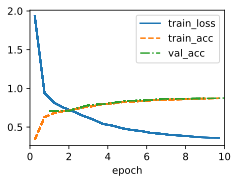

In [22]:
model = AlexNetModified(lr=0.01)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

In [26]:
import torchvision.models as models
import torch
from ptflops import get_model_complexity_info

In [36]:
with torch.cuda.device(0):
  macs, params = get_model_complexity_info(model, (1, 224, 224), as_strings=True,
                                           print_per_layer_stat=True, verbose=True)
  print('{:<30}  {:<8}'.format('Computational complexity: ', macs))
  print('{:<30}  {:<8}'.format('Number of parameters: ', params))

AlexNetModified(
  3.71 M, 100.000% Params, 182.59 MMac, 100.000% MACs, 
  (net): Sequential(
    3.71 M, 100.000% Params, 182.59 MMac, 100.000% MACs, 
    (0): Conv2d(800, 0.022% Params, 9.68 MMac, 5.301% MACs, 1, 16, kernel_size=(7, 7), stride=(2, 2), padding=(1, 1))
    (1): ReLU(0, 0.000% Params, 193.6 KMac, 0.106% MACs, )
    (2): MaxPool2d(0, 0.000% Params, 193.6 KMac, 0.106% MACs, kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(25.66 k, 0.692% Params, 74.84 MMac, 40.985% MACs, 16, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(0, 0.000% Params, 186.62 KMac, 0.102% MACs, )
    (5): MaxPool2d(0, 0.000% Params, 186.62 KMac, 0.102% MACs, kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(55.39 k, 1.494% Params, 37.44 MMac, 20.507% MACs, 64, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(0, 0.000% Params, 64.9 KMac, 0.036% MACs, )
    (8): Conv2d(83.04 k, 2.240% Params, 56.14 MM